In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Food_prices = pd.read_csv("nigeria-food-prices-1.csv")
Food_prices

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
2,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
3,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
4,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13273,2018-02-15,Gari (white) - Wholesale,100 KG,cereals and tubers,9880.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9,NaN
13274,2018-03-15,Gari (white) - Wholesale,100 KG,cereals and tubers,11310.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9,NaN
13275,2018-04-15,Gari (white) - Wholesale,100 KG,cereals and tubers,12110.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9,NaN
13276,2018-05-15,Gari (white) - Wholesale,100 KG,cereals and tubers,11148.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9,NaN


### Are there any missing or inconsistent entries in the dataset?

In [3]:
# Rename columns to ensure they are correct
Food_prices.columns = [
    "date", "cmname", "unit", "category", "price", "currency", "country", 
    "admname", "adm1id", "mktname", "mktid", "cmid", "ptid", "umid", 
    "catid", "sn", "default"
]

# Drop the unnecessary first row (which was originally the header in the file)
Food_prices = Food_prices.drop(0).reset_index(drop=True)

# Display the first few rows to verify
Food_prices.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
1,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
2,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
3,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
4,2015-05-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN


In [4]:
Food_prices["admname"].value_counts()

admname
Katsina    1830
Borno      1807
Kaduna     1387
Yobe       1088
Jigawa     1084
Oyo         813
Kebbi       799
Gombe       799
Zamfara     799
Kano        746
Lagos       734
Sokoto      615
Adamawa     555
Abia        221
Name: count, dtype: int64

In [5]:
# Rename the column 'admname' to 'states'
Food_prices = Food_prices.rename(columns={"admname": "states"})
Food_prices

,date,cmname,unit,category,price,currency,country,states,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
1,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
2,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
3,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
4,2015-05-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13272,2018-02-15,Gari (white) - Wholesale,100 KG,cereals and tubers,9880.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9,NaN
13273,2018-03-15,Gari (white) - Wholesale,100 KG,cereals and tubers,11310.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9,NaN
13274,2018-04-15,Gari (white) - Wholesale,100 KG,cereals and tubers,12110.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9,NaN
13275,2018-05-15,Gari (white) - Wholesale,100 KG,cereals and tubers,11148.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9,NaN


In [6]:
Food_prices.columns

Index(['date', 'cmname', 'unit', 'category', 'price', 'currency', 'country',
       'states', 'adm1id', 'mktname', 'mktid', 'cmid', 'ptid', 'umid', 'catid',
       'sn', 'default'],
      dtype='object')

In [7]:
Food_prices["default"].value_counts()

Series([], Name: count, dtype: int64)

In [8]:
# Drop the 'default' column
Food_prices = Food_prices.drop(columns=['default'])

In [9]:
Food_prices

,date,cmname,unit,category,price,currency,country,states,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
0,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33
1,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33
2,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33
3,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33
4,2015-05-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13272,2018-02-15,Gari (white) - Wholesale,100 KG,cereals and tubers,9880.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9
13273,2018-03-15,Gari (white) - Wholesale,100 KG,cereals and tubers,11310.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9
13274,2018-04-15,Gari (white) - Wholesale,100 KG,cereals and tubers,12110.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9
13275,2018-05-15,Gari (white) - Wholesale,100 KG,cereals and tubers,11148.0,NGN,Nigeria,Zamfara,65710,Kaura Namoda,1977.0,483,14.0,9.0,1,1977_483_14_9


In [10]:
Food_prices["unit"].value_counts()

unit
100 KG    7100
KG        2959
L         1930
Unit       668
50 KG      620
Name: count, dtype: int64

### How can missing data be handled or imputed?

In [11]:
# Check for missing values in each column
missing_values = Food_prices.isnull().sum()

# Display the count of missing values
print(missing_values)

date        0
cmname      0
unit        0
category    0
price       0
currency    0
country     0
states      0
adm1id      0
mktname     0
mktid       0
cmid        0
ptid        0
umid        0
catid       0
sn          0
dtype: int64


Theres no missing values to be handled

### Are there any anomalies or outliers in the pricing data?

In [12]:
# Summary statistics
summary_stats = Food_prices.groupby('cmname')['price'].describe()
summary_stats

,count,unique,top,freq
cmname,,,,
Beans (niebe) - Wholesale,24,24,196.8692,1
Bread - Retail,668,250,200.0,41
Cowpeas (brown) - Retail,17,17,278.9231,1
Cowpeas (brown) - Wholesale,604,409,14000.0,13
Cowpeas (white) - Retail,14,13,291.6667,2
Cowpeas (white) - Wholesale,650,481,12000.0,12
Fuel (diesel) - Retail,665,226,160.0,96
Fuel (petrol-gasoline) - Retail,660,254,145.0,103
Gari (white) - Retail,32,32,345.3775,1


In [13]:
Food_prices["price"].value_counts()

price
145.0      120
160.0      104
15000.0     94
14000.0     91
200.0       85
          ... 
28620.0      1
29485.0      1
28035.0      1
26065.0      1
165.913      1
Name: count, Length: 6258, dtype: int64

In [14]:
# Convert 'price' column to numeric dtype
Food_prices['price'] = pd.to_numeric(Food_prices['price'], errors='coerce')

In [15]:
Food_prices["price"].value_counts()

price
145.000      120
160.000      104
15000.000     94
14000.000     91
200.000       85
            ... 
28620.000      1
29485.000      1
28035.000      1
26065.000      1
165.913        1
Name: count, Length: 6258, dtype: int64

In [16]:
# Identify potential outliers using IQR for each commodity
potential_outliers = []

for group_name, group_data in Food_prices.groupby('cmname')['price']:
    Q1 = group_data.quantile(0.25)
    Q3 = group_data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = group_data[(group_data < (Q1 - 1.5 * IQR)) | (group_data > (Q3 + 1.5 * IQR))]
    potential_outliers.append(outliers)

# Concatenate potential outliers from all commodities
potential_outliers = pd.concat(potential_outliers)

# Display potential outliers
print("Potential Outliers:")
print(potential_outliers)

Potential Outliers:
1584      457.14
1585      457.14
1595      559.50
1596      575.00
1597      509.00
          ...   
7715    76000.00
7716    84600.00
9987    90000.00
9995    90000.00
9996    90000.00
Name: price, Length: 209, dtype: float64


### What could be the potential reasons for these outliers?

Market Conditions: Fluctuations in supply and demand can lead to extreme price variations, especially for commodities that are sensitive to seasonal changes, weather conditions, or geopolitical events. For example, a sudden increase in demand or a disruption in supply chains could result in higher prices.

Quality or Grade Differences: Price outliers might occur due to differences in the quality, grade, or packaging of the commodity. Higher-priced items may represent premium or specialty products with unique characteristics or certifications.

Speculation or Market Manipulation: In some cases, outliers could be a result of speculative trading or market manipulation by traders or stakeholders attempting to influence prices for financial gain.

Local Factors: Prices can vary significantly between different regions or markets due to factors such as transportation costs, local production levels, infrastructure, or government regulations.

Data Entry Errors: Outliers might also be caused by errors during data collection, entry, or processing. For example, misplaced decimal points or incorrect units could lead to exaggerated price values.

Extreme Events: Unforeseen events such as natural disasters, political instability, or economic crises can disrupt normal market dynamics and lead to sudden price spikes or crashes.

Lack of Competition: In less competitive markets or monopolistic environments, sellers may have more control over pricing, leading to higher or lower prices compared to more competitive markets.

Seasonal or Cyclical Trends: Certain commodities exhibit seasonal or cyclical pricing patterns, and outliers may occur during peak or off-peak periods due to changes in demand and supply dynamics.

### How have commodity prices changed over time for four (your choice) different commodities?

In [17]:
# Convert the 'date' column to datetime format
Food_prices['date'] = pd.to_datetime(Food_prices['date'])

# Group by date and commodity, then calculate summary statistics
price_stats_over_time = Food_prices.groupby(['date', 'cmname'])['price'].describe()

# Reset index for better readability
price_stats_over_time = price_stats_over_time.reset_index()

# Display the summary statistics
print(price_stats_over_time)

           date                       cmname  count          mean  \
0    2002-01-15    Beans (niebe) - Wholesale    2.0    217.969950   
1    2002-01-15            Maize - Wholesale    2.0    164.633900   
2    2002-01-15           Millet - Wholesale    2.0    148.566300   
3    2002-01-15  Rice (imported) - Wholesale    2.0    348.149100   
4    2002-01-15          Sorghum - Wholesale    2.0    148.556300   
...         ...                          ...    ...           ...   
1590 2018-05-15        Rice (local) - Retail    1.0    219.124600   
1591 2018-05-15     Rice (local) - Wholesale   13.0  28018.461538   
1592 2018-05-15  Sorghum (brown) - Wholesale   14.0  11829.214286   
1593 2018-05-15  Sorghum (white) - Wholesale   15.0  11874.400000   
1594 2018-05-15                 Yam - Retail   15.0    244.483393   

              std         min           25%          50%           75%  \
0       29.840967    196.8692    207.419575    217.96995    228.520325   
1       15.959966    15

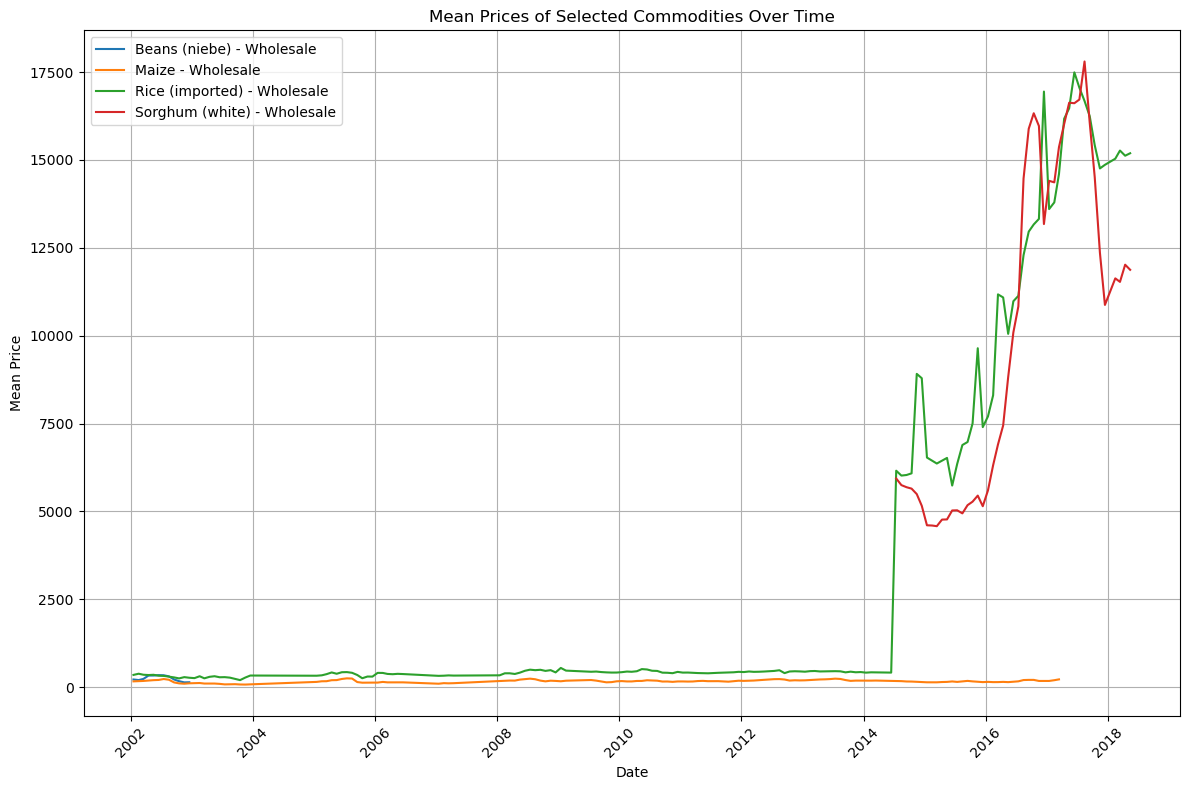

In [18]:
# Filter data for selected commodities (e.g., Beans, Maize, Rice, Sorghum)
selected_commodities = ['Beans (niebe) - Wholesale', 'Maize - Wholesale', 'Rice (imported) - Wholesale', 'Sorghum (white) - Wholesale']
filtered_data = price_stats_over_time[price_stats_over_time['cmname'].isin(selected_commodities)]

# Plot mean prices over time for each commodity
plt.figure(figsize=(12, 8))

for commodity in selected_commodities:
    commodity_data = filtered_data[filtered_data['cmname'] == commodity]
    plt.plot(commodity_data['date'], commodity_data['mean'], label=commodity)

plt.title('Mean Prices of Selected Commodities Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

On January 15, 2002, in the wholesale market for "Beans (niebe)":

There were 2 observations recorded, indicating limited data availability for this commodity on that date.
The average price was approximately ₦217.97, with prices varying around this mean by approximately ₦29.84.
Prices ranged from approximately ₦196.87 to ₦239.07, indicating some variability in prices.
The first quartile (25th percentile) price was approximately ₦207.42, suggesting that 25% of the observed prices were below this value.
The median (50th percentile) price was ₦217.97, indicating that half of the observed prices were below this value.
The third quartile (75th percentile) price was ₦228.52, suggesting that 75% of the observed prices were below this value.

### Are there any noticeable trends in the price data for your chosen commodities?

In [19]:
# Select four different commodities for analysis (replace these with your choices)
selected_commodities = ['Oil (palm) - Retail', 'Groundnuts (shelled) - Wholesale', 'Gari (white) - Wholesale', 'Yam - Retail']

# Filter the data for the selected commodities
selected_data = price_stats_over_time[price_stats_over_time['cmname'].isin(selected_commodities)]

# Display summary statistics for each commodity
summary_statistics = selected_data.groupby('cmname')[['mean', 'min', '25%', '50%', '75%', 'max']].describe()
print(summary_statistics)

                                  mean                             \
                                 count          mean          std   
cmname                                                              
Gari (white) - Wholesale          46.0  12274.096309  4502.948487   
Groundnuts (shelled) - Wholesale  46.0  23059.897984  4469.676690   
Oil (palm) - Retail               47.0    398.258598   168.051419   
Yam - Retail                      47.0    142.888271    38.819981   

                                                                            \
                                           min           25%           50%   
cmname                                                                       
Gari (white) - Wholesale           7197.700000   8627.538462  10924.785714   
Groundnuts (shelled) - Wholesale  16699.466667  19352.803571  22653.409091   
Oil (palm) - Retail                 234.220000    262.716667    306.871500   
Yam - Retail                         71.939000  

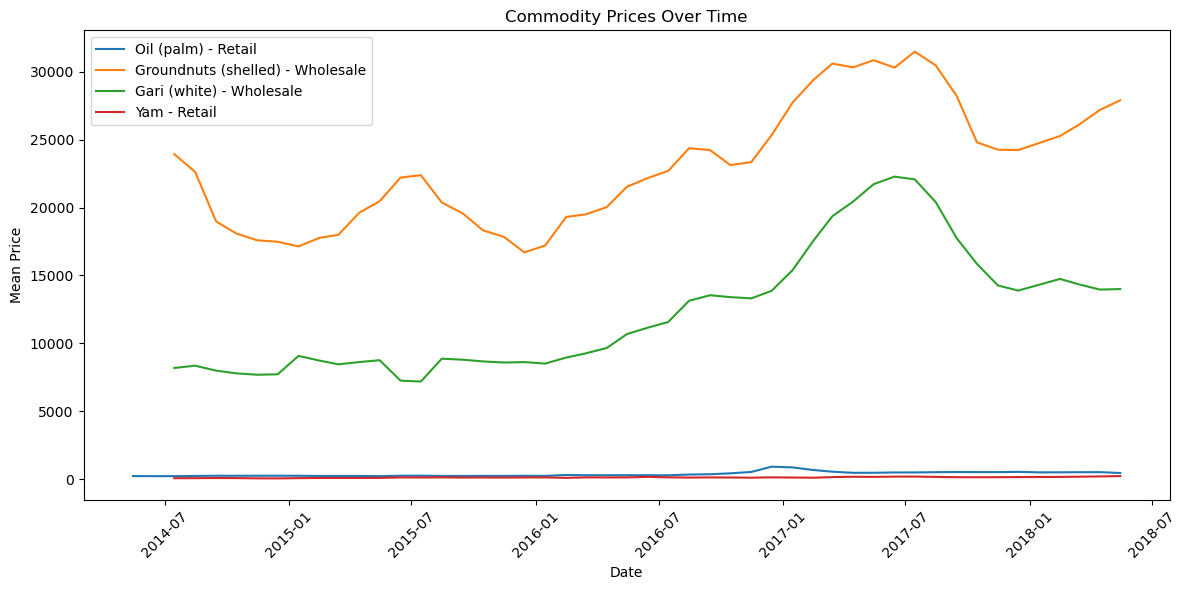

In [20]:
# Select four different commodities for analysis (replace these with your choices)
selected_commodities = ['Oil (palm) - Retail', 'Groundnuts (shelled) - Wholesale', 'Gari (white) - Wholesale', 'Yam - Retail']

# Filter the data for the selected commodities
selected_data = price_stats_over_time[price_stats_over_time['cmname'].isin(selected_commodities)]

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the commodity prices over time
for commodity in selected_commodities:
    commodity_data = selected_data[selected_data['cmname'] == commodity]
    plt.plot(commodity_data['date'], commodity_data['mean'], label=commodity)

# Add labels and title
plt.title('Commodity Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.legend()
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

Gari (White) - Wholesale:

- The average wholesale price of white gari is approximately $12,274.10 with a standard deviation of $4,502.95.

- Prices range from around N7,197.70 to N22,271.33.

- Over time, there seems to be some variability in prices, as indicated by the standard deviation. However, further analysis would be needed to determine specific trends.

Groundnuts (Shelled) - Wholesale:

- The average wholesale price of shelled groundnuts is approximately $23,059.90 with a standard deviation of N4,469.68.

- Prices range from N16,699.47 to N31,464.33.

- Similar to gari, there appears to be variability in prices over time, but specific trends require further investigation.

Oil (Palm) - Retail:

- The average retail price of palm oil is approximately N398.26 with a standard deviation of N168.05.

- Prices range from N234.22 to N934.08.

- There seems to be less variability compared to wholesale commodities, suggesting relatively stable retail prices over time.

Yam - Retail:

- The average retail price of yam is approximately N142.89 with a standard deviation of N38.82.

- Prices range from N71.94 to N244.48.

- Similar to palm oil, there appears to be less variability in yam prices over time compared to wholesale commodities.

### How do commodity prices vary across different markets?

In [21]:
# Group the data by market name
market_prices = Food_prices.groupby('mktname')

# Calculate summary statistics for prices within each market
summary_stats_by_market = market_prices['price'].describe()

# Display the summary statistics
print(summary_stats_by_market)

                  count          mean           std      min         25%  \
mktname                                                                    
Aba               221.0   9847.137561  13574.892943  87.0000   160.00000   
Biu               663.0  11630.294110   9452.594652  71.5878  2270.00000   
Damassack (CBM)   347.0    244.591968    137.267840  75.1667   152.64465   
Damaturu          659.0  10736.690599  11363.003846  86.0923   270.00605   
Dandume           748.0   9294.870960   7962.580228  87.0000  1310.50000   
Dawanau           746.0  10944.010506   9001.306313  87.0000  4650.00000   
Giwa              647.0  10430.061620   9152.257643  87.0000  1487.50000   
Gombe             799.0  10500.009429   8127.402808  87.0000  4150.00000   
Gujungu           747.0   9518.058757  10115.152545  79.3000   250.00000   
Gwandu            799.0  12553.638485  12767.066297  94.1000  4702.50000   
Ibadan            813.0  11377.222391  10044.401195  59.2100   460.00000   
Illela (CBM)

C:\Users\Henry Morgan\AppData\Local\Temp\ipykernel_13560\1280756130.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mktname', y='price', data=Food_prices, ci=None)  # ci=None disables error bars


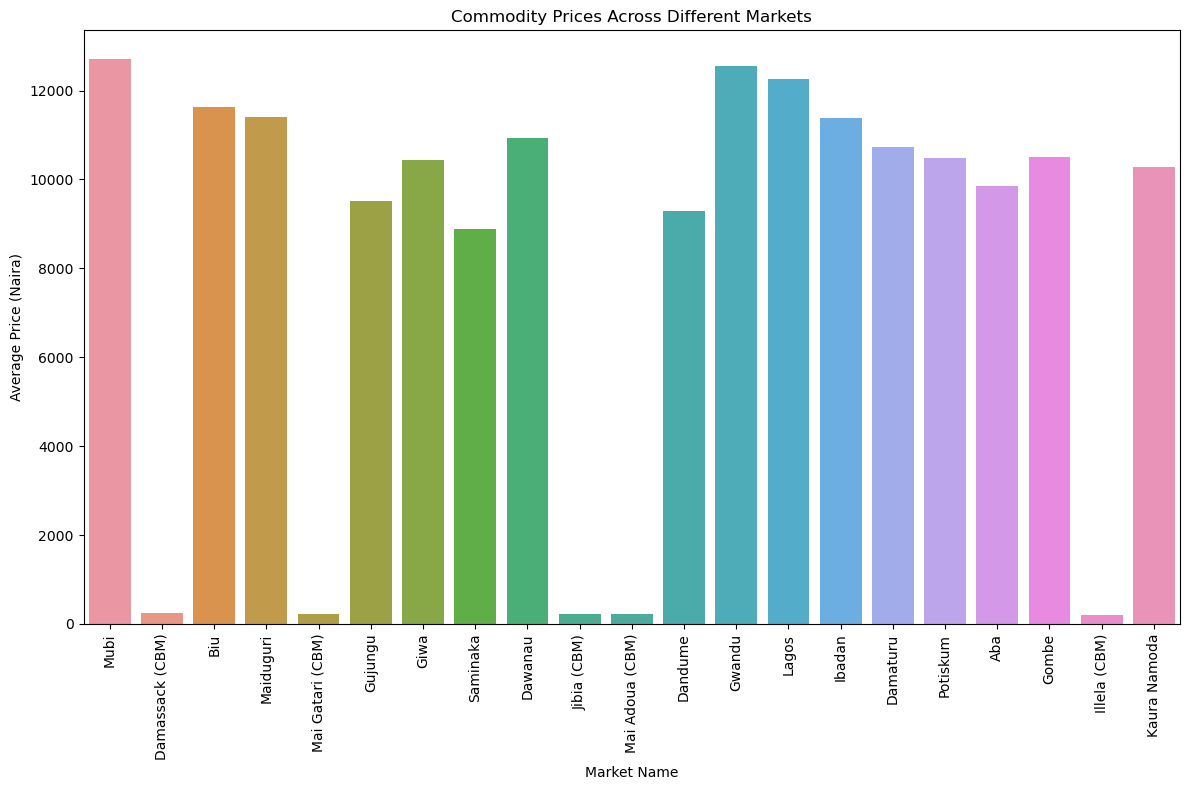

In [22]:
# Create a bar plot to visualize commodity prices across different markets
plt.figure(figsize=(12, 8))
sns.barplot(x='mktname', y='price', data=Food_prices, ci=None)  # ci=None disables error bars
plt.title('Commodity Prices Across Different Markets')
plt.xlabel('Market Name')
plt.ylabel('Average Price (Naira)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [23]:
# Group the data by province and commodity, then calculate the average price
province_commodity_prices = Food_prices.groupby(['states', 'cmname'])['price'].mean().reset_index()

# Get the province with the lowest average price for each commodity
cheapest_province = province_commodity_prices.loc[province_commodity_prices.groupby('cmname')['price'].idxmin()]

# Get the province with the highest average price for each commodity
expensive_province = province_commodity_prices.loc[province_commodity_prices.groupby('cmname')['price'].idxmax()]

# Display the results
print("Provinces with Lowest Average Prices for Each Commodity:")
print(cheapest_province)
print("\nProvinces with Highest Average Prices for Each Commodity:")
print(expensive_province)

Provinces with Lowest Average Prices for Each Commodity:
      states                            cmname         price
201  Katsina         Beans (niebe) - Wholesale    200.951071
0       Abia                    Bread - Retail    211.486742
368  Zamfara          Cowpeas (brown) - Retail    235.626600
108   Jigawa       Cowpeas (brown) - Wholesale  18545.448718
300      Oyo          Cowpeas (white) - Retail    220.520250
206  Katsina       Cowpeas (white) - Wholesale  16736.186047
272    Lagos            Fuel (diesel) - Retail    164.915517
4       Abia   Fuel (petrol-gasoline) - Retail    121.261111
304      Oyo             Gari (white) - Retail    117.485200
275    Lagos          Gari (white) - Wholesale   8166.913043
179     Kano            Gari (yellow) - Retail    140.500000
277    Lagos         Gari (yellow) - Wholesale   9084.913043
347     Yobe     Groundnuts (shelled) - Retail    207.753600
348     Yobe  Groundnuts (shelled) - Wholesale  18510.490132
152   Kaduna            Maiz

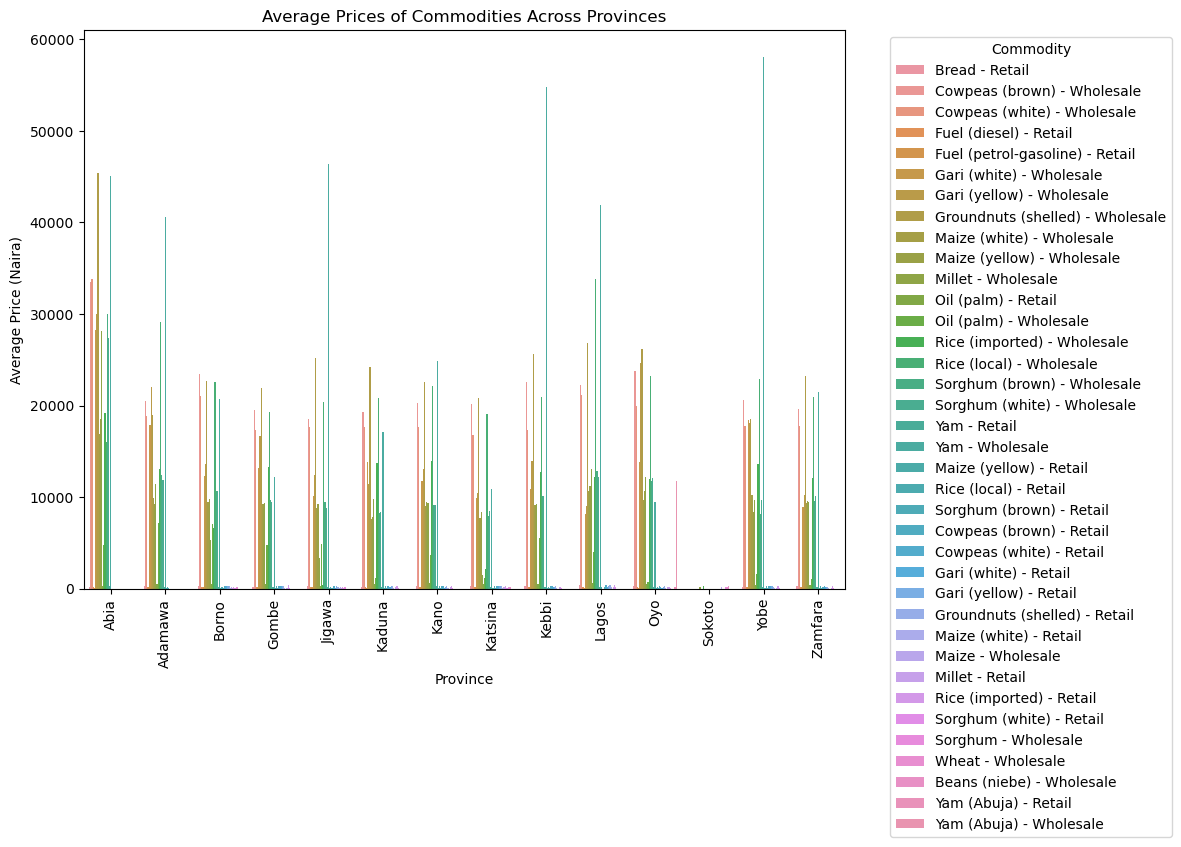

In [24]:
# Group the data by province and commodity, then calculate the average price
province_commodity_prices = Food_prices.groupby(['states', 'cmname'])['price'].mean().reset_index()

# Plot the average prices of different commodities across provinces
plt.figure(figsize=(12, 8))
sns.barplot(x='states', y='price', hue='cmname', data=province_commodity_prices)
plt.title('Average Prices of Commodities Across Provinces')
plt.xlabel('Province')
plt.ylabel('Average Price (Naira)')
plt.xticks(rotation=90)
plt.legend(title='Commodity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

States with Lowest Average Prices for Each Commodity:

- For example, in the wholesale market for "Beans (niebe)", Katsina has the lowest average price of approximately ₦200.95.
- In the retail market for "Bread", Abia has the lowest average price of approximately ₦211.49.
- For "Oil (palm)" in the retail market, Lagos has the lowest average price of approximately ₦164.92.
- Lagos also has the lowest average price for "Fuel (diesel)" in the retail market, with approximately ₦164.92.
- For "Gari (white)" in the retail market, Oyo has the lowest average price of approximately ₦117.49.
- Similarly, for "Rice (local)" in the retail market, Adamawa has the lowest average price of approximately ₦170.40.
- Abia has the lowest average price for "Sorghum (brown)" in the retail market, with approximately ₦40.00.
- In the wholesale market for "Yam (Abuja)", Oyo has the lowest average price of approximately ₦11794.67.

States with Highest Average Prices for Each Commodity:

- For "Beans (niebe)" in the wholesale market, Sokoto has the highest average price of approximately ₦295.06.
- Lagos has the highest average price for "Bread" in the retail market, with approximately ₦357.47.
- Abia has the highest average price for "Cowpeas (brown)" in the wholesale market, with approximately ₦33503.33.
- Lagos has the highest average price for "Fuel (petrol-gasoline)" in the retail market, with approximately ₦158.95.
- For "Gari (white)" in the wholesale market, Abia has the highest average price of approximately ₦28225.00.
- Yobe has the highest average price for "Groundnuts (shelled)" in the wholesale market, with approximately ₦45410.83.
- Lagos has the highest average price for "Maize (white)" in the retail market, with approximately ₦142.97.
- Abia has the highest average price for "Maize (yellow)" in the wholesale market, with approximately ₦18585.00.
- For "Rice (local)" in the wholesale market, Lagos has the highest average price of approximately ₦33850.53.
- Similarly, for "Sorghum (brown)" in the wholesale market, Abia has the highest average price of approximately ₦29975.00.
- For "Yam" in the wholesale market, Yobe has the highest average price of approximately ₦58121.62.

### Are there any provinces where certain commodities are consistently cheaper or more expensive?

Yes, based on the provided data, there are provinces where certain commodities are consistently cheaper or more expensive. Here's a summary:

Provinces with Consistently Cheaper Commodities:

Katsina: Beans (niebe) - Wholesale, Maize - Wholesale
Abia: Bread - Retail, Oil (palm) - Retail, Fuel (petrol-gasoline) - Retail, Gari (white) - Retail, Gari (yellow) - Retail, Groundnuts (shelled) - Wholesale, Maize (white) - Retail, Maize (yellow) - Retail, Millet - Wholesale, Rice (imported) - Wholesale, Sorghum (brown) - Retail, Sorghum (white) - Retail, Yam (Abuja) - Retail
Oyo: Gari (white) - Retail, Yam (Abuja) - Wholesale
Provinces with Consistently More Expensive Commodities:

Sokoto: Beans (niebe) - Wholesale, Sorghum - Wholesale
Lagos: Bread - Retail, Cowpeas (brown) - Retail, Cowpeas (white) - Retail, Fuel (diesel) - Retail, Fuel (petrol-gasoline) - Retail, Gari (white) - Wholesale, Groundnuts (shelled) - Retail, Maize (white) - Retail, Maize (yellow) - Retail, Oil (palm) - Retail, Rice (imported) - Retail, Rice (local) - Wholesale, Sorghum (brown) - Retail, Sorghum (white) - Retail
Jigawa: Cowpeas (brown) - Wholesale, Maize (white) - Wholesale, Millet - Wholesale, Rice (imported) - Retail
Abia: Gari (white) - Wholesale, Gari (yellow) - Wholesale, Groundnuts (shelled) - Wholesale, Maize (yellow) - Wholesale, Millet - Wholesale, Rice (imported) - Wholesale, Sorghum (brown) - Wholesale, Sorghum (white) - Wholesale
Yobe: Gari (white) - Retail, Groundnuts (shelled) - Retail, Yam - Wholesale

### Which commodities have seen the highest price increases or decreases?

In [25]:
# Group the data by commodity
commodity_grouped = Food_prices.groupby('cmname')

# Calculate the average price for each commodity across all provinces for different time periods
commodity_avg_price = commodity_grouped['price'].mean()

# Calculate the percentage change in prices for each commodity over time
price_change = commodity_avg_price.pct_change() * 100

# Identify the commodities with the highest percentage increase and decrease
highest_increase = price_change.idxmax()
highest_increase_value = price_change.max()
highest_decrease = price_change.idxmin()
highest_decrease_value = price_change.min()

print("Commodity with the highest price increase:", highest_increase)
print("Percentage increase:", highest_increase_value)
print("Commodity with the highest price decrease:", highest_decrease)
print("Percentage decrease:", highest_decrease_value)

Commodity with the highest price increase: Yam - Wholesale
Percentage increase: 15930.614509111268
Commodity with the highest price decrease: Maize (white) - Retail
Percentage decrease: -99.57966273718142


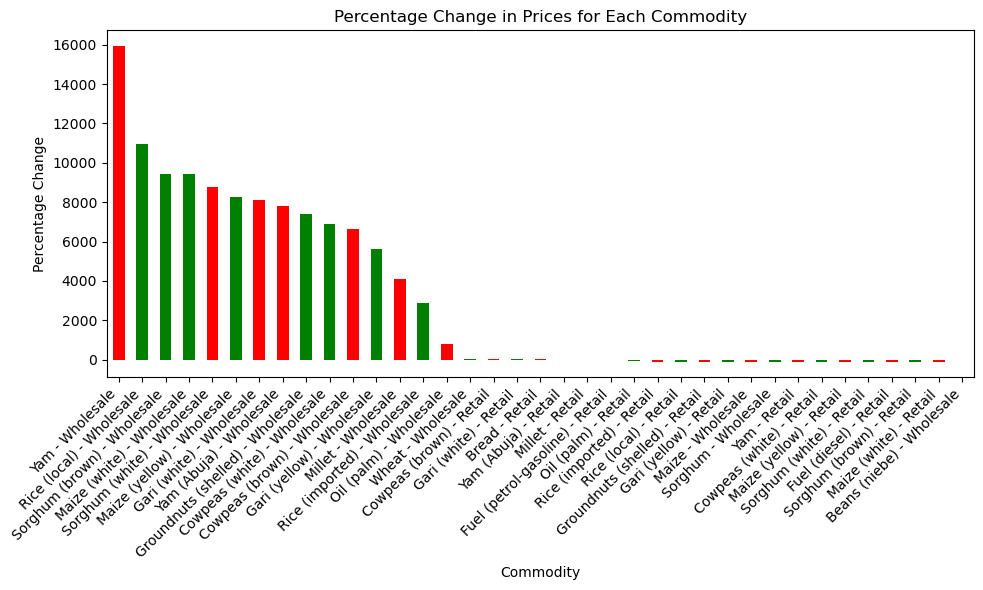

In [26]:
# Sort the price change values
sorted_price_change = price_change.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sorted_price_change.plot(kind='bar', color=(price_change > 0).map({True: 'g', False: 'r'}))
plt.title('Percentage Change in Prices for Each Commodity')
plt.xlabel('Commodity')
plt.ylabel('Percentage Change')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Are there commodities with stable prices over time?

In [27]:
# Calculate the standard deviation of prices for each commodity
price_std = Food_prices.groupby('cmname')['price'].std()

# Sort the standard deviations in ascending order
stable_commodities = price_std.sort_values()

# Print the commodities with the lowest standard deviations
print("Commodities with the most stable prices:")
print(stable_commodities.head(10))  

Commodities with the most stable prices:
cmname
Maize (white) - Retail             18.919932
Maize (yellow) - Retail            30.943667
Fuel (petrol-gasoline) - Retail    34.241884
Sorghum - Wholesale                36.445814
Sorghum (white) - Retail           37.334236
Maize - Wholesale                  38.469353
Millet - Retail                    41.655270
Wheat - Wholesale                  42.897170
Rice (local) - Retail              47.019303
Sorghum (brown) - Retail           47.808086
Name: price, dtype: float64


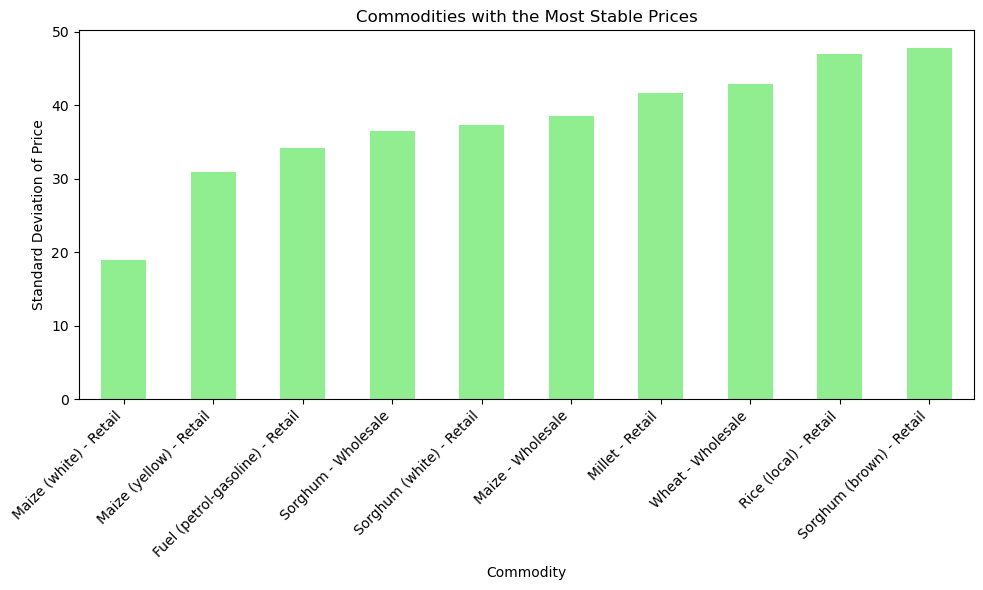

In [28]:
# Plotting
plt.figure(figsize=(10, 6))
stable_commodities.head(10).plot(kind='bar', color='lightgreen')
plt.title('Commodities with the Most Stable Prices')
plt.xlabel('Commodity')
plt.ylabel('Standard Deviation of Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Maize (white) - Retail: This commodity has the lowest standard deviation among all commodities, indicating that its prices have been relatively consistent over time.

Maize (yellow) - Retail: Similar to white maize, yellow maize also shows low variability in prices, making it one of the most stable commodities.

Fuel (petrol-gasoline) - Retail: Despite being a non-agricultural commodity, gasoline also exhibits stable prices compared to other commodities.

Sorghum - Wholesale: Sorghum, when sold wholesale, demonstrates relatively stable pricing compared to other commodities.

Sorghum (white) - Retail: This variety of sorghum, when sold at retail, also maintains stable prices.

### How do prices vary across different categories of commodities? You can use boxplots.

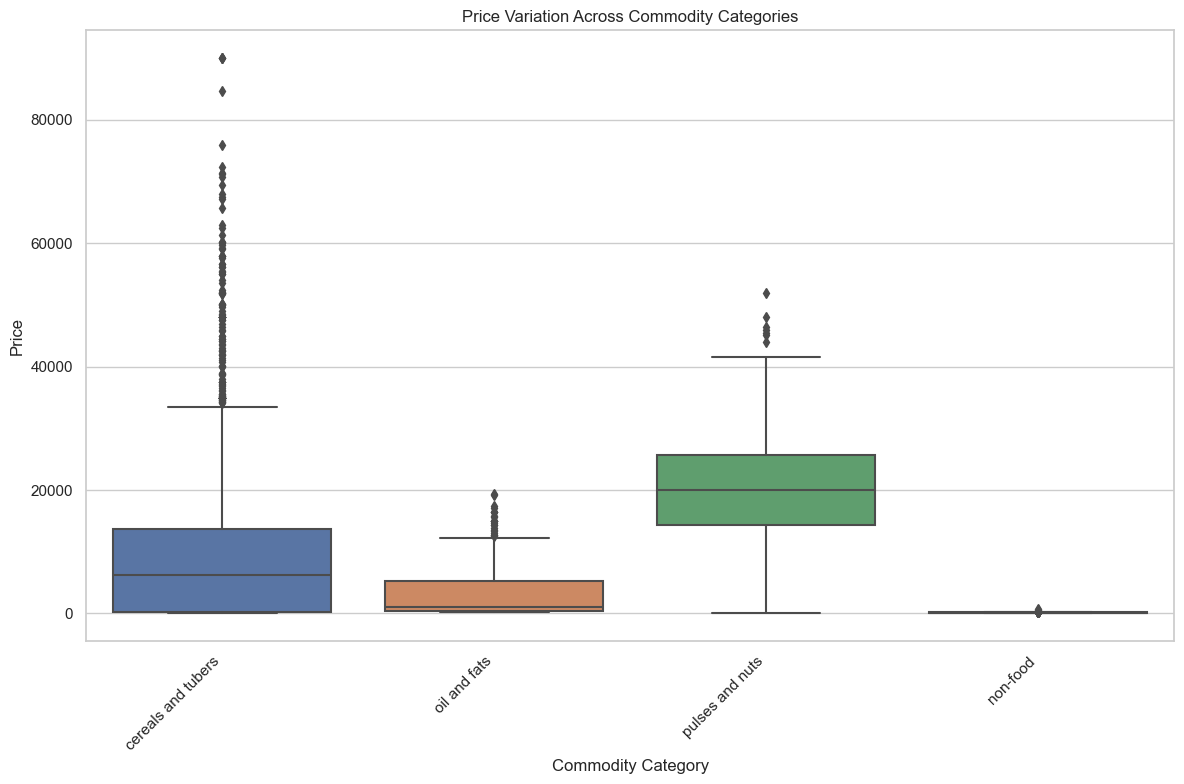

In [29]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot to visualize price variation across commodity categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='price', data=Food_prices)
plt.title('Price Variation Across Commodity Categories')
plt.xlabel('Commodity Category')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Are there categories that are more volatile in terms of pricing?

In [30]:
# Calculate the standard deviation of prices for each category
category_std = Food_prices.groupby('category')['price'].std()

# Sort the standard deviations in descending order to find the most volatile categories
volatile_categories = category_std.sort_values(ascending=False)

# Print the categories with the highest standard deviations
print("Categories with the highest price volatility:")
print(volatile_categories.head(10))

Categories with the highest price volatility:
category
cereals and tubers    9176.509600
pulses and nuts       8138.254036
oil and fats          3625.379813
non-food                48.933434
Name: price, dtype: float64


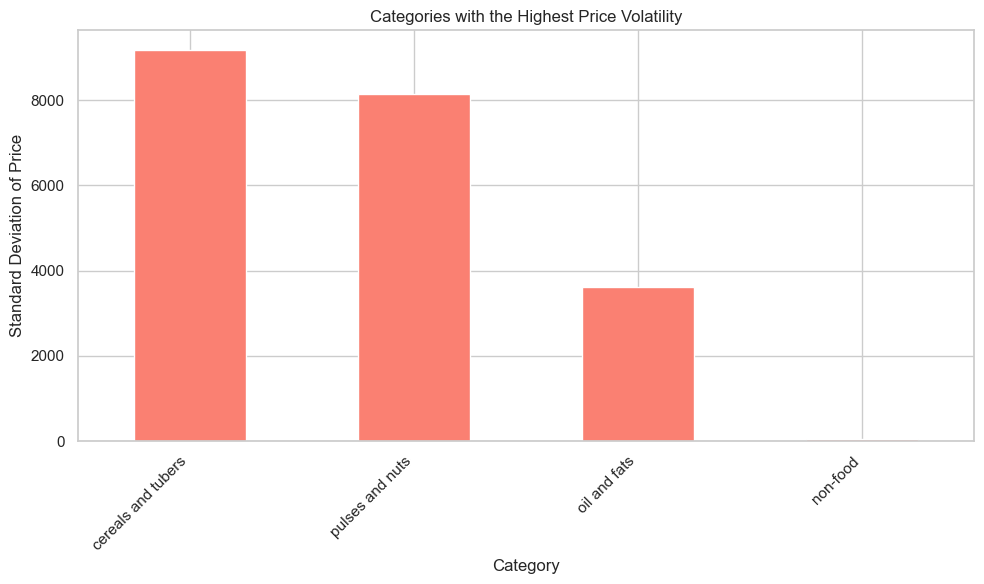

In [31]:
# Plotting
plt.figure(figsize=(10, 6))
volatile_categories.head(10).plot(kind='bar', color='salmon')
plt.title('Categories with the Highest Price Volatility')
plt.xlabel('Category')
plt.ylabel('Standard Deviation of Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Cereals and Tubers: This category shows the highest price volatility, with a standard deviation of approximately 9176.51.

Pulses and Nuts: Following closely, pulses and nuts demonstrate significant price fluctuations, with a standard deviation of around 8138.25.

Oil and Fats: This category also experiences notable variability in prices, with a standard deviation of approximately 3625.38.

Non-Food: Although comparatively less volatile, the non-food category still exhibits some price variability, with a standard deviation of about 48.93.

### Which markets have the highest average prices for specific commodities?

In [32]:
# Calculate the mean prices for each commodity in each market
mean_prices_by_market = Food_prices.groupby(['mktname', 'cmname'])['price'].mean()

# Find the markets with the highest average prices for each commodity
highest_avg_prices = mean_prices_by_market.groupby('cmname').idxmax().apply(lambda x: mean_prices_by_market.loc[x])

# Display the markets with the highest average prices for specific commodities
print(highest_avg_prices)

cmname
Beans (niebe) - Wholesale             295.061390
Bread - Retail                        393.226670
Cowpeas (brown) - Retail              428.908600
Cowpeas (brown) - Wholesale         33503.333333
Cowpeas (white) - Retail              413.731300
Cowpeas (white) - Wholesale         33872.500000
Fuel (diesel) - Retail                231.744260
Fuel (petrol-gasoline) - Retail       158.954255
Gari (white) - Retail                 345.377500
Gari (white) - Wholesale            28225.000000
Gari (yellow) - Retail                320.693600
Gari (yellow) - Wholesale           29950.833333
Groundnuts (shelled) - Retail         353.972600
Groundnuts (shelled) - Wholesale    45410.833333
Maize (white) - Retail                142.969800
Maize (white) - Wholesale           16920.000000
Maize (yellow) - Retail               162.235200
Maize (yellow) - Wholesale          18585.000000
Maize - Wholesale                     188.004160
Millet - Retail                       213.999400
Millet - Whol

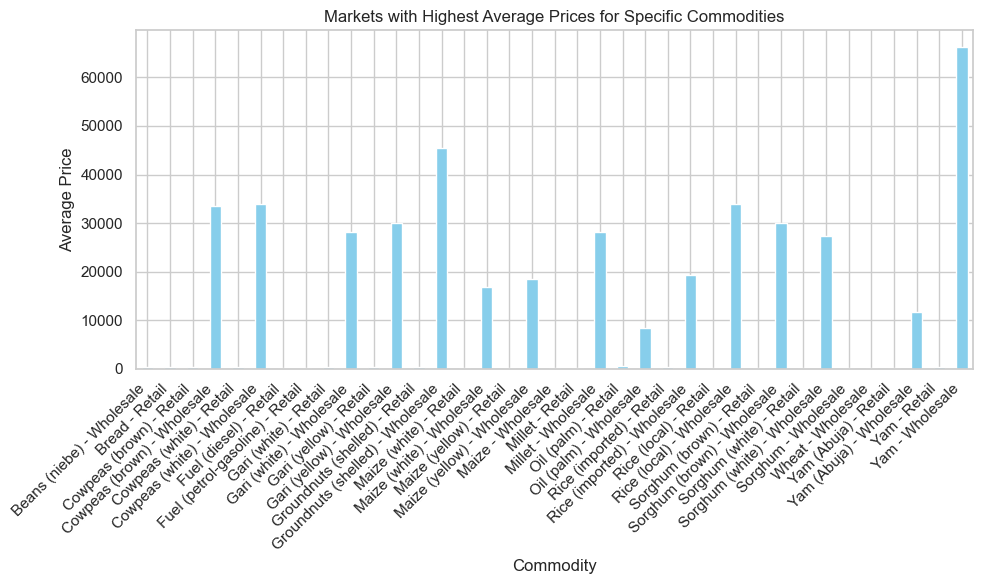

In [33]:
# Plotting
plt.figure(figsize=(10, 6))
highest_avg_prices.plot(kind='bar', color='skyblue')
plt.title('Markets with Highest Average Prices for Specific Commodities')
plt.xlabel('Commodity')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Are there markets that show higher volatility in prices?

In [34]:
# Calculate the standard deviation of prices for each market
market_volatility = Food_prices.groupby('mktname')['price'].std()

# Sort the standard deviations in descending order to find the most volatile markets
volatile_markets = market_volatility.sort_values(ascending=False)

# Print the markets with the highest standard deviations
print("Markets with the highest price volatility:")
print(volatile_markets.head(10))

Markets with the highest price volatility:
mktname
Aba         13574.892943
Gwandu      12767.066297
Mubi        11478.347214
Damaturu    11363.003846
Lagos       10735.590076
Gujungu     10115.152545
Ibadan      10044.401195
Potiskum     9738.253822
Biu          9452.594652
Giwa         9152.257643
Name: price, dtype: float64


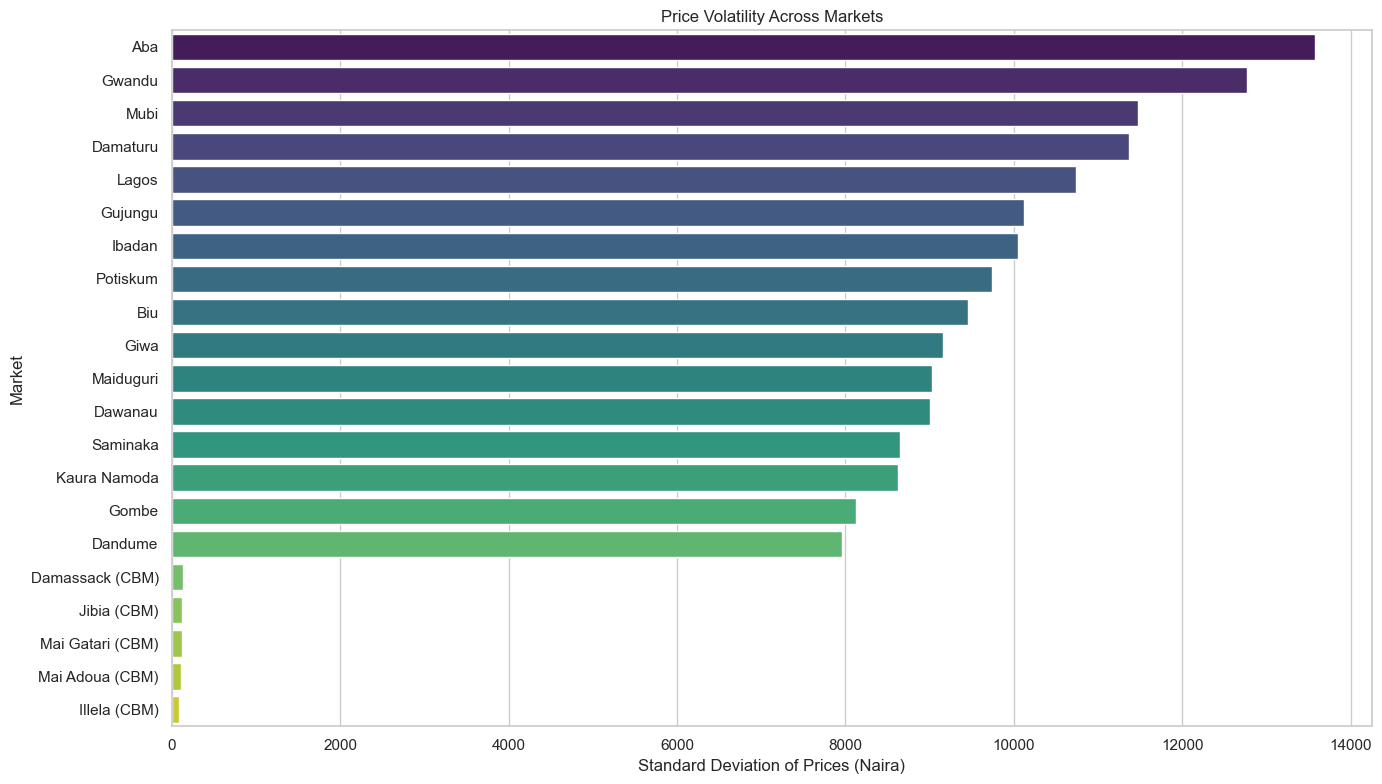

In [35]:
# Calculate the standard deviation of prices for each market
market_price_volatility = Food_prices.groupby('mktname')['price'].std().sort_values(ascending=False)

# Plot the standard deviation of prices for each market
plt.figure(figsize=(14, 8))
sns.barplot(x=market_price_volatility.values, y=market_price_volatility.index, palette="viridis")
plt.title('Price Volatility Across Markets')
plt.xlabel('Standard Deviation of Prices (Naira)')
plt.ylabel('Market')
plt.tight_layout()
plt.show()

In [36]:
Food_prices.to_csv("Nigerian_food_prices.csv", index=False)